In [1]:
# Import the required modules
import pandas as pd
pd.set_option('display.max_columns', None)
import numpy as np

# visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Machine Learning
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold

# Metrics
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score, roc_curve, RocCurveDisplay

# Pre-Processing
from sklearn.preprocessing import StandardScaler, OneHotEncoder, OrdinalEncoder
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer

# Models
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, ExtraTreesClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

# suppress warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv("heart_attack_2022_location.csv")
print(df.shape)
df.head()

(246022, 44)


,Unnamed: 0,State,Sex,GeneralHealth,PhysicalHealthDays,MentalHealthDays,LastCheckupTime,PhysicalActivities,SleepHours,RemovedTeeth,HadHeartAttack,HadAngina,HadStroke,HadAsthma,HadSkinCancer,HadCOPD,HadDepressiveDisorder,HadKidneyDisease,HadArthritis,HadDiabetes,DeafOrHardOfHearing,BlindOrVisionDifficulty,DifficultyConcentrating,DifficultyWalking,DifficultyDressingBathing,DifficultyErrands,SmokerStatus,ECigaretteUsage,ChestScan,RaceEthnicityCategory,AgeCategory,HeightInMeters,WeightInKilograms,BMI,AlcoholDrinkers,HIVTesting,FluVaxLast12,PneumoVaxEver,TetanusLast10Tdap,HighRiskLastYear,CovidPos,state&teritory,latitude,longitude
0,0,Alabama,Female,Very good,4,0,Within past year (anytime less than 12 months ...,Yes,9,None of them,No,No,No,No,No,No,No,No,Yes,No,No,No,No,No,No,No,Former smoker,Never used e-cigarettes in my entire life,No,"White only, Non-Hispanic",Age 65 to 69,1.60,71.67,27.99,No,No,Yes,Yes,"Yes, received Tdap",No,No,AL,32.318231,-86.902298
1,1,Alabama,Male,Very good,0,0,Within past year (anytime less than 12 months ...,Yes,6,None of them,No,No,No,No,No,No,No,No,Yes,Yes,No,No,No,No,No,No,Former smoker,Never used e-cigarettes in my entire life,No,"White only, Non-Hispanic",Age 70 to 74,1.78,95.25,30.13,No,No,Yes,Yes,"Yes, received tetanus shot but not sure what type",No,No,AL,32.318231,-86.902298
2,2,Alabama,Male,Very good,0,0,Within past year (anytime less than 12 months ...,No,8,"6 or more, but not all",No,No,No,No,No,No,No,No,Yes,No,No,Yes,No,Yes,No,No,Former smoker,Never used e-cigarettes in my entire life,Yes,"White only, Non-Hispanic",Age 75 to 79,1.85,108.86,31.66,Yes,No,No,Yes,"No, did not receive any tetanus shot in the pa...",No,Yes,AL,32.318231,-86.902298
3,3,Alabama,Female,Fair,5,0,Within past year (anytime less than 12 months ...,Yes,9,None of them,No,No,No,No,Yes,No,Yes,No,Yes,No,No,No,No,Yes,No,No,Never smoked,Never used e-cigarettes in my entire life,No,"White only, Non-Hispanic",Age 80 or older,1.70,90.72,31.32,No,No,Yes,Yes,"No, did not receive any tetanus shot in the pa...",No,Yes,AL,32.318231,-86.902298
4,4,Alabama,Female,Good,3,15,Within past year (anytime less than 12 months ...,Yes,5,1 to 5,No,No,No,No,No,No,No,No,Yes,No,No,No,No,No,No,No,Never smoked,Never used e-cigarettes in my entire life,No,"White only, Non-Hispanic",Age 80 or older,1.55,79.38,33.07,No,No,Yes,Yes,"No, did not receive any tetanus shot in the pa...",No,No,AL,32.318231,-86.902298


In [3]:
# Check for missing values
print(df.isnull().sum())

Unnamed: 0                   0
State                        0
Sex                          0
GeneralHealth                0
PhysicalHealthDays           0
MentalHealthDays             0
LastCheckupTime              0
PhysicalActivities           0
SleepHours                   0
RemovedTeeth                 0
HadHeartAttack               0
HadAngina                    0
HadStroke                    0
HadAsthma                    0
HadSkinCancer                0
HadCOPD                      0
HadDepressiveDisorder        0
HadKidneyDisease             0
HadArthritis                 0
HadDiabetes                  0
DeafOrHardOfHearing          0
BlindOrVisionDifficulty      0
DifficultyConcentrating      0
DifficultyWalking            0
DifficultyDressingBathing    0
DifficultyErrands            0
SmokerStatus                 0
ECigaretteUsage              0
ChestScan                    0
RaceEthnicityCategory        0
AgeCategory                  0
HeightInMeters               0
WeightIn

In [4]:
 df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 246022 entries, 0 to 246021
Data columns (total 44 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   Unnamed: 0                 246022 non-null  int64  
 1   State                      246022 non-null  object 
 2   Sex                        246022 non-null  object 
 3   GeneralHealth              246022 non-null  object 
 4   PhysicalHealthDays         246022 non-null  int64  
 5   MentalHealthDays           246022 non-null  int64  
 6   LastCheckupTime            246022 non-null  object 
 7   PhysicalActivities         246022 non-null  object 
 8   SleepHours                 246022 non-null  int64  
 9   RemovedTeeth               246022 non-null  object 
 10  HadHeartAttack             246022 non-null  object 
 11  HadAngina                  246022 non-null  object 
 12  HadStroke                  246022 non-null  object 
 13  HadAsthma                  24

In [5]:
df.head()

,Unnamed: 0,State,Sex,GeneralHealth,PhysicalHealthDays,MentalHealthDays,LastCheckupTime,PhysicalActivities,SleepHours,RemovedTeeth,HadHeartAttack,HadAngina,HadStroke,HadAsthma,HadSkinCancer,HadCOPD,HadDepressiveDisorder,HadKidneyDisease,HadArthritis,HadDiabetes,DeafOrHardOfHearing,BlindOrVisionDifficulty,DifficultyConcentrating,DifficultyWalking,DifficultyDressingBathing,DifficultyErrands,SmokerStatus,ECigaretteUsage,ChestScan,RaceEthnicityCategory,AgeCategory,HeightInMeters,WeightInKilograms,BMI,AlcoholDrinkers,HIVTesting,FluVaxLast12,PneumoVaxEver,TetanusLast10Tdap,HighRiskLastYear,CovidPos,state&teritory,latitude,longitude
0,0,Alabama,Female,Very good,4,0,Within past year (anytime less than 12 months ...,Yes,9,None of them,No,No,No,No,No,No,No,No,Yes,No,No,No,No,No,No,No,Former smoker,Never used e-cigarettes in my entire life,No,"White only, Non-Hispanic",Age 65 to 69,1.60,71.67,27.99,No,No,Yes,Yes,"Yes, received Tdap",No,No,AL,32.318231,-86.902298
1,1,Alabama,Male,Very good,0,0,Within past year (anytime less than 12 months ...,Yes,6,None of them,No,No,No,No,No,No,No,No,Yes,Yes,No,No,No,No,No,No,Former smoker,Never used e-cigarettes in my entire life,No,"White only, Non-Hispanic",Age 70 to 74,1.78,95.25,30.13,No,No,Yes,Yes,"Yes, received tetanus shot but not sure what type",No,No,AL,32.318231,-86.902298
2,2,Alabama,Male,Very good,0,0,Within past year (anytime less than 12 months ...,No,8,"6 or more, but not all",No,No,No,No,No,No,No,No,Yes,No,No,Yes,No,Yes,No,No,Former smoker,Never used e-cigarettes in my entire life,Yes,"White only, Non-Hispanic",Age 75 to 79,1.85,108.86,31.66,Yes,No,No,Yes,"No, did not receive any tetanus shot in the pa...",No,Yes,AL,32.318231,-86.902298
3,3,Alabama,Female,Fair,5,0,Within past year (anytime less than 12 months ...,Yes,9,None of them,No,No,No,No,Yes,No,Yes,No,Yes,No,No,No,No,Yes,No,No,Never smoked,Never used e-cigarettes in my entire life,No,"White only, Non-Hispanic",Age 80 or older,1.70,90.72,31.32,No,No,Yes,Yes,"No, did not receive any tetanus shot in the pa...",No,Yes,AL,32.318231,-86.902298
4,4,Alabama,Female,Good,3,15,Within past year (anytime less than 12 months ...,Yes,5,1 to 5,No,No,No,No,No,No,No,No,Yes,No,No,No,No,No,No,No,Never smoked,Never used e-cigarettes in my entire life,No,"White only, Non-Hispanic",Age 80 or older,1.55,79.38,33.07,No,No,Yes,Yes,"No, did not receive any tetanus shot in the pa...",No,No,AL,32.318231,-86.902298


In [6]:
df.Sex.value_counts()

Sex
Female    127811
Male      118211
Name: count, dtype: int64

In [7]:
 df.groupby("Sex").BMI.describe()

,count,mean,std,min,25%,50%,75%,max
Sex,,,,,,,,
Female,127811.0,28.619383,7.054929,12.02,23.57,27.44,32.22,97.65
Male,118211.0,28.720848,5.872868,12.16,24.96,27.80,31.57,97.65


In [8]:
df.groupby("Sex").PhysicalHealthDays.describe()

,count,mean,std,min,25%,50%,75%,max
Sex,,,,,,,,
Female,127811.0,4.475374,8.607564,0.0,0.0,0.0,4.0,30.0
Male,118211.0,3.733739,8.164705,0.0,0.0,0.0,2.0,30.0


In [9]:
df.groupby("Sex").MentalHealthDays.describe()

,count,mean,std,min,25%,50%,75%,max
Sex,,,,,,,,
Female,127811.0,4.881747,8.562534,0.0,0.0,0.0,5.0,30.0
Male,118211.0,3.394498,7.497944,0.0,0.0,0.0,2.0,30.0


In [10]:
df.groupby("Sex").SleepHours.describe()

,count,mean,std,min,25%,50%,75%,max
Sex,,,,,,,,
Female,127811.0,7.043212,1.458613,1.0,6.0,7.0,8.0,24.0
Male,118211.0,6.997674,1.420666,1.0,6.0,7.0,8.0,24.0


In [11]:
 # Dealing with Strings
# Ticket, Name, Embarked, Sex, (Pclass), Has_Cabin
# Only four are categories: Embarked, Sex, PClass, Has_Cabin

# DROP: Ticket & Name columns
# Future work: Extract the titles from the NAME column to use as an additional category
cols_to_drop = ["Unnamed: 0", "latitude", "longitude","state&teritory"]
df.drop(columns=cols_to_drop, inplace=True)
# 
df.head()

,State,Sex,GeneralHealth,PhysicalHealthDays,MentalHealthDays,LastCheckupTime,PhysicalActivities,SleepHours,RemovedTeeth,HadHeartAttack,HadAngina,HadStroke,HadAsthma,HadSkinCancer,HadCOPD,HadDepressiveDisorder,HadKidneyDisease,HadArthritis,HadDiabetes,DeafOrHardOfHearing,BlindOrVisionDifficulty,DifficultyConcentrating,DifficultyWalking,DifficultyDressingBathing,DifficultyErrands,SmokerStatus,ECigaretteUsage,ChestScan,RaceEthnicityCategory,AgeCategory,HeightInMeters,WeightInKilograms,BMI,AlcoholDrinkers,HIVTesting,FluVaxLast12,PneumoVaxEver,TetanusLast10Tdap,HighRiskLastYear,CovidPos
0,Alabama,Female,Very good,4,0,Within past year (anytime less than 12 months ...,Yes,9,None of them,No,No,No,No,No,No,No,No,Yes,No,No,No,No,No,No,No,Former smoker,Never used e-cigarettes in my entire life,No,"White only, Non-Hispanic",Age 65 to 69,1.60,71.67,27.99,No,No,Yes,Yes,"Yes, received Tdap",No,No
1,Alabama,Male,Very good,0,0,Within past year (anytime less than 12 months ...,Yes,6,None of them,No,No,No,No,No,No,No,No,Yes,Yes,No,No,No,No,No,No,Former smoker,Never used e-cigarettes in my entire life,No,"White only, Non-Hispanic",Age 70 to 74,1.78,95.25,30.13,No,No,Yes,Yes,"Yes, received tetanus shot but not sure what type",No,No
2,Alabama,Male,Very good,0,0,Within past year (anytime less than 12 months ...,No,8,"6 or more, but not all",No,No,No,No,No,No,No,No,Yes,No,No,Yes,No,Yes,No,No,Former smoker,Never used e-cigarettes in my entire life,Yes,"White only, Non-Hispanic",Age 75 to 79,1.85,108.86,31.66,Yes,No,No,Yes,"No, did not receive any tetanus shot in the pa...",No,Yes
3,Alabama,Female,Fair,5,0,Within past year (anytime less than 12 months ...,Yes,9,None of them,No,No,No,No,Yes,No,Yes,No,Yes,No,No,No,No,Yes,No,No,Never smoked,Never used e-cigarettes in my entire life,No,"White only, Non-Hispanic",Age 80 or older,1.70,90.72,31.32,No,No,Yes,Yes,"No, did not receive any tetanus shot in the pa...",No,Yes
4,Alabama,Female,Good,3,15,Within past year (anytime less than 12 months ...,Yes,5,1 to 5,No,No,No,No,No,No,No,No,Yes,No,No,No,No,No,No,No,Never smoked,Never used e-cigarettes in my entire life,No,"White only, Non-Hispanic",Age 80 or older,1.55,79.38,33.07,No,No,Yes,Yes,"No, did not receive any tetanus shot in the pa...",No,No


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 246022 entries, 0 to 246021
Data columns (total 40 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   State                      246022 non-null  object 
 1   Sex                        246022 non-null  object 
 2   GeneralHealth              246022 non-null  object 
 3   PhysicalHealthDays         246022 non-null  int64  
 4   MentalHealthDays           246022 non-null  int64  
 5   LastCheckupTime            246022 non-null  object 
 6   PhysicalActivities         246022 non-null  object 
 7   SleepHours                 246022 non-null  int64  
 8   RemovedTeeth               246022 non-null  object 
 9   HadHeartAttack             246022 non-null  object 
 10  HadAngina                  246022 non-null  object 
 11  HadStroke                  246022 non-null  object 
 12  HadAsthma                  246022 non-null  object 
 13  HadSkinCancer              24

In [13]:
df.isnull().sum()

State                        0
Sex                          0
GeneralHealth                0
PhysicalHealthDays           0
MentalHealthDays             0
LastCheckupTime              0
PhysicalActivities           0
SleepHours                   0
RemovedTeeth                 0
HadHeartAttack               0
HadAngina                    0
HadStroke                    0
HadAsthma                    0
HadSkinCancer                0
HadCOPD                      0
HadDepressiveDisorder        0
HadKidneyDisease             0
HadArthritis                 0
HadDiabetes                  0
DeafOrHardOfHearing          0
BlindOrVisionDifficulty      0
DifficultyConcentrating      0
DifficultyWalking            0
DifficultyDressingBathing    0
DifficultyErrands            0
SmokerStatus                 0
ECigaretteUsage              0
ChestScan                    0
RaceEthnicityCategory        0
AgeCategory                  0
HeightInMeters               0
WeightInKilograms            0
BMI     

In [14]:
df.head(4)

,State,Sex,GeneralHealth,PhysicalHealthDays,MentalHealthDays,LastCheckupTime,PhysicalActivities,SleepHours,RemovedTeeth,HadHeartAttack,HadAngina,HadStroke,HadAsthma,HadSkinCancer,HadCOPD,HadDepressiveDisorder,HadKidneyDisease,HadArthritis,HadDiabetes,DeafOrHardOfHearing,BlindOrVisionDifficulty,DifficultyConcentrating,DifficultyWalking,DifficultyDressingBathing,DifficultyErrands,SmokerStatus,ECigaretteUsage,ChestScan,RaceEthnicityCategory,AgeCategory,HeightInMeters,WeightInKilograms,BMI,AlcoholDrinkers,HIVTesting,FluVaxLast12,PneumoVaxEver,TetanusLast10Tdap,HighRiskLastYear,CovidPos
0,Alabama,Female,Very good,4,0,Within past year (anytime less than 12 months ...,Yes,9,None of them,No,No,No,No,No,No,No,No,Yes,No,No,No,No,No,No,No,Former smoker,Never used e-cigarettes in my entire life,No,"White only, Non-Hispanic",Age 65 to 69,1.60,71.67,27.99,No,No,Yes,Yes,"Yes, received Tdap",No,No
1,Alabama,Male,Very good,0,0,Within past year (anytime less than 12 months ...,Yes,6,None of them,No,No,No,No,No,No,No,No,Yes,Yes,No,No,No,No,No,No,Former smoker,Never used e-cigarettes in my entire life,No,"White only, Non-Hispanic",Age 70 to 74,1.78,95.25,30.13,No,No,Yes,Yes,"Yes, received tetanus shot but not sure what type",No,No
2,Alabama,Male,Very good,0,0,Within past year (anytime less than 12 months ...,No,8,"6 or more, but not all",No,No,No,No,No,No,No,No,Yes,No,No,Yes,No,Yes,No,No,Former smoker,Never used e-cigarettes in my entire life,Yes,"White only, Non-Hispanic",Age 75 to 79,1.85,108.86,31.66,Yes,No,No,Yes,"No, did not receive any tetanus shot in the pa...",No,Yes
3,Alabama,Female,Fair,5,0,Within past year (anytime less than 12 months ...,Yes,9,None of them,No,No,No,No,Yes,No,Yes,No,Yes,No,No,No,No,Yes,No,No,Never smoked,Never used e-cigarettes in my entire life,No,"White only, Non-Hispanic",Age 80 or older,1.70,90.72,31.32,No,No,Yes,Yes,"No, did not receive any tetanus shot in the pa...",No,Yes


In [48]:
# Determine the number of unique values in each column.
cols = ["State","Sex",	"GeneralHealth", "PhysicalHealthDays", "MentalHealthDays",	"LastCheckupTime", "PhysicalActivities", "SleepHours", 
        "RemovedTeeth", "HadHeartAttack",	"HadAngina", "HadStroke", "HadAsthma", "HadSkinCancer",	"HadCOPD",	"HadDepressiveDisorder",	
        "HadKidneyDisease", "HadArthritis",	"HadDiabetes", "DeafOrHardOfHearing", "BlindOrVisionDifficulty",	"DifficultyConcentrating",	
        "DifficultyWalking",  "DifficultyDressingBathing",	"DifficultyErrands",	"SmokerStatus", "ECigaretteUsage", "ChestScan",	
        "RaceEthnicityCategory",	"AgeCategory", "HeightInMeters","WeightInKilograms", "BMI", "AlcoholDrinkers", "HIVTesting", "FluVaxLast12", 
        "PneumoVaxEver", "TetanusLast10Tdap", "HighRiskLastYear", "CovidPos"]

for col in cols:
  print(col)
  print(df[col].nunique())
  print(df[col].value_counts())
  print()

State
54
State
Washington              15000
Maryland                 9165
Minnesota                9161
Ohio                     8995
New York                 8923
Texas                    7408
Florida                  7315
Kansas                   6145
Wisconsin                6126
Maine                    6013
Iowa                     5672
Hawaii                   5596
Virginia                 5565
Indiana                  5502
South Carolina           5471
Massachusetts            5465
Arizona                  5462
Utah                     5373
Michigan                 5370
Colorado                 5159
Nebraska                 5107
California               5096
Connecticut              5053
Georgia                  4978
Vermont                  4845
South Dakota             4405
Montana                  4264
Missouri                 4195
New Jersey               3967
New Hampshire            3756
Puerto Rico              3589
Idaho                    3468
Alaska                   

In [15]:
 # Encoding, separate out features
meta = ['HadHeartAttack']
num_features = ['PhysicalHealthDays', 'SleepHours', 'BMI', 'MentalHealthDays']
cat_features = ['Sex', 'RaceEthnicityCategory', 'AgeCategory','SmokerStatus','AlcoholDrinkers','GeneralHealth']

In [16]:
df_meta= df.loc[:, meta]
df_meta.describe()

,HadHeartAttack
count,246022
unique,2
top,No
freq,232587


In [17]:
df_meta['HadHeartAttack'] = df_meta.HadHeartAttack.apply(lambda x: 0 if x == "Yes" else 1)
df_meta.head()

,HadHeartAttack
0,1
1,1
2,1
3,1
4,1


In [18]:
# NUMERIC FIRST - Do we need a SCALER?
df_num = df.loc[:, num_features]
df_num.describe()

,PhysicalHealthDays,SleepHours,BMI,MentalHealthDays
count,246022.000000,246022.000000,246022.000000,246022.000000
mean,4.119026,7.021331,28.668136,4.167140
std,8.405844,1.440681,6.513973,8.102687
min,0.000000,1.000000,12.020000,0.000000
25%,0.000000,6.000000,24.270000,0.000000
50%,0.000000,7.000000,27.460000,0.000000
75%,3.000000,8.000000,31.890000,4.000000
max,30.000000,24.000000,97.650000,30.000000


In [19]:
# Categorical Up Next
df_cat = df.loc[:, cat_features]
df_cat.head()

,Sex,RaceEthnicityCategory,AgeCategory,SmokerStatus,AlcoholDrinkers,GeneralHealth
0,Female,"White only, Non-Hispanic",Age 65 to 69,Former smoker,No,Very good
1,Male,"White only, Non-Hispanic",Age 70 to 74,Former smoker,No,Very good
2,Male,"White only, Non-Hispanic",Age 75 to 79,Former smoker,Yes,Very good
3,Female,"White only, Non-Hispanic",Age 80 or older,Never smoked,No,Fair
4,Female,"White only, Non-Hispanic",Age 80 or older,Never smoked,No,Good


In [20]:
# Label Encode SEX
df_cat["Sex"] = df_cat.Sex.apply(lambda x: 0 if x == "Male" else 1)
df_cat.head()

,Sex,RaceEthnicityCategory,AgeCategory,SmokerStatus,AlcoholDrinkers,GeneralHealth
0,1,"White only, Non-Hispanic",Age 65 to 69,Former smoker,No,Very good
1,0,"White only, Non-Hispanic",Age 70 to 74,Former smoker,No,Very good
2,0,"White only, Non-Hispanic",Age 75 to 79,Former smoker,Yes,Very good
3,1,"White only, Non-Hispanic",Age 80 or older,Never smoked,No,Fair
4,1,"White only, Non-Hispanic",Age 80 or older,Never smoked,No,Good


In [21]:
# Label Encode SEX
df_cat["AlcoholDrinkers"] = df_cat.AlcoholDrinkers.apply(lambda x: 0 if x == "Yes" else 1)
df_cat.head()

,Sex,RaceEthnicityCategory,AgeCategory,SmokerStatus,AlcoholDrinkers,GeneralHealth
0,1,"White only, Non-Hispanic",Age 65 to 69,Former smoker,1,Very good
1,0,"White only, Non-Hispanic",Age 70 to 74,Former smoker,1,Very good
2,0,"White only, Non-Hispanic",Age 75 to 79,Former smoker,0,Very good
3,1,"White only, Non-Hispanic",Age 80 or older,Never smoked,1,Fair
4,1,"White only, Non-Hispanic",Age 80 or older,Never smoked,1,Good


In [22]:
df_cat.RaceEthnicityCategory.value_counts()

RaceEthnicityCategory
White only, Non-Hispanic         186336
Hispanic                          22570
Black only, Non-Hispanic          19330
Other race only, Non-Hispanic     12205
Multiracial, Non-Hispanic          5581
Name: count, dtype: int64

In [23]:
# One Hot Encoding
df_cat["RaceEthnicityCategory"] = df_cat.RaceEthnicityCategory.astype(str)
df_cat = pd.get_dummies(df_cat, dtype=int)
df_cat.head()

,Sex,AlcoholDrinkers,"RaceEthnicityCategory_Black only, Non-Hispanic",RaceEthnicityCategory_Hispanic,"RaceEthnicityCategory_Multiracial, Non-Hispanic","RaceEthnicityCategory_Other race only, Non-Hispanic","RaceEthnicityCategory_White only, Non-Hispanic",AgeCategory_Age 18 to 24,AgeCategory_Age 25 to 29,AgeCategory_Age 30 to 34,AgeCategory_Age 35 to 39,AgeCategory_Age 40 to 44,AgeCategory_Age 45 to 49,AgeCategory_Age 50 to 54,AgeCategory_Age 55 to 59,AgeCategory_Age 60 to 64,AgeCategory_Age 65 to 69,AgeCategory_Age 70 to 74,AgeCategory_Age 75 to 79,AgeCategory_Age 80 or older,SmokerStatus_Current smoker - now smokes every day,SmokerStatus_Current smoker - now smokes some days,SmokerStatus_Former smoker,SmokerStatus_Never smoked,GeneralHealth_Excellent,GeneralHealth_Fair,GeneralHealth_Good,GeneralHealth_Poor,GeneralHealth_Very good
0,1,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1
1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1
2,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1
3,1,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0
4,1,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0


In [24]:
# # Put Everything Back Together
# df_final = df.loc[:,meta]
df_final = pd.concat([df_meta, df_num], axis=1)
df_final = pd.concat([df_final, df_cat], axis=1)
df_final.head()

,HadHeartAttack,PhysicalHealthDays,SleepHours,BMI,MentalHealthDays,Sex,AlcoholDrinkers,"RaceEthnicityCategory_Black only, Non-Hispanic",RaceEthnicityCategory_Hispanic,"RaceEthnicityCategory_Multiracial, Non-Hispanic","RaceEthnicityCategory_Other race only, Non-Hispanic","RaceEthnicityCategory_White only, Non-Hispanic",AgeCategory_Age 18 to 24,AgeCategory_Age 25 to 29,AgeCategory_Age 30 to 34,AgeCategory_Age 35 to 39,AgeCategory_Age 40 to 44,AgeCategory_Age 45 to 49,AgeCategory_Age 50 to 54,AgeCategory_Age 55 to 59,AgeCategory_Age 60 to 64,AgeCategory_Age 65 to 69,AgeCategory_Age 70 to 74,AgeCategory_Age 75 to 79,AgeCategory_Age 80 or older,SmokerStatus_Current smoker - now smokes every day,SmokerStatus_Current smoker - now smokes some days,SmokerStatus_Former smoker,SmokerStatus_Never smoked,GeneralHealth_Excellent,GeneralHealth_Fair,GeneralHealth_Good,GeneralHealth_Poor,GeneralHealth_Very good
0,1,4,9,27.99,0,1,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1
1,1,0,6,30.13,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1
2,1,0,8,31.66,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1
3,1,5,9,31.32,0,1,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0
4,1,3,5,33.07,15,1,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0


In [25]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 246022 entries, 0 to 246021
Data columns (total 34 columns):
 #   Column                                               Non-Null Count   Dtype  
---  ------                                               --------------   -----  
 0   HadHeartAttack                                       246022 non-null  int64  
 1   PhysicalHealthDays                                   246022 non-null  int64  
 2   SleepHours                                           246022 non-null  int64  
 3   BMI                                                  246022 non-null  float64
 4   MentalHealthDays                                     246022 non-null  int64  
 5   Sex                                                  246022 non-null  int64  
 6   AlcoholDrinkers                                      246022 non-null  int64  
 7   RaceEthnicityCategory_Black only, Non-Hispanic       246022 non-null  int32  
 8   RaceEthnicityCategory_Hispanic                       2

In [26]:
# Feature selection
# correlation analysis
corrs = df_final.corr()
corrs

,HadHeartAttack,PhysicalHealthDays,SleepHours,BMI,MentalHealthDays,Sex,AlcoholDrinkers,"RaceEthnicityCategory_Black only, Non-Hispanic",RaceEthnicityCategory_Hispanic,"RaceEthnicityCategory_Multiracial, Non-Hispanic","RaceEthnicityCategory_Other race only, Non-Hispanic","RaceEthnicityCategory_White only, Non-Hispanic",AgeCategory_Age 18 to 24,AgeCategory_Age 25 to 29,AgeCategory_Age 30 to 34,AgeCategory_Age 35 to 39,AgeCategory_Age 40 to 44,AgeCategory_Age 45 to 49,AgeCategory_Age 50 to 54,AgeCategory_Age 55 to 59,AgeCategory_Age 60 to 64,AgeCategory_Age 65 to 69,AgeCategory_Age 70 to 74,AgeCategory_Age 75 to 79,AgeCategory_Age 80 or older,SmokerStatus_Current smoker - now smokes every day,SmokerStatus_Current smoker - now smokes some days,SmokerStatus_Former smoker,SmokerStatus_Never smoked,GeneralHealth_Excellent,GeneralHealth_Fair,GeneralHealth_Good,GeneralHealth_Poor,GeneralHealth_Very good
HadHeartAttack,1.000000,-0.133420,-0.003631,-0.030413,-0.025892,0.073316,-0.074181,0.011076,0.023148,-0.004232,0.006220,-0.024221,0.053068,0.048216,0.050453,0.051119,0.049331,0.035142,0.025214,0.006342,-0.006661,-0.033260,-0.058590,-0.073567,-0.100296,-0.039031,-0.011101,-0.074537,0.094843,0.079933,-0.112319,-0.014322,-0.140607,0.085347
PhysicalHealthDays,-0.133420,1.000000,-0.056063,0.116905,0.306800,0.044081,0.129370,0.001106,0.007837,0.015022,-0.011535,-0.005347,-0.043592,-0.039704,-0.034374,-0.036012,-0.022664,-0.010164,0.005056,0.026740,0.033136,0.013043,0.017776,0.023905,0.029670,0.084946,0.037074,0.053976,-0.112049,-0.166234,0.305192,-0.053386,0.461930,-0.214249
SleepHours,-0.003631,-0.056063,1.000000,-0.054750,-0.130100,0.015793,0.003540,-0.037060,-0.026688,-0.033388,-0.037920,0.072040,-0.002184,-0.018275,-0.037501,-0.050561,-0.045944,-0.042060,-0.036017,-0.029301,-0.004370,0.033839,0.052866,0.062656,0.090810,-0.056707,-0.026514,0.025837,0.018816,0.042371,-0.040686,-0.019358,-0.033772,0.027277
BMI,-0.030413,0.116905,-0.054750,1.000000,0.082182,-0.007782,0.070867,0.076677,0.022883,0.011127,-0.044501,-0.044862,-0.092295,-0.026221,0.004623,0.022204,0.038060,0.049311,0.056900,0.047257,0.022897,0.004196,-0.014498,-0.040145,-0.096273,-0.016316,-0.010876,0.032951,-0.016757,-0.177355,0.137801,0.117223,0.068631,-0.097669
MentalHealthDays,-0.025892,0.306800,-0.130100,0.082182,1.000000,0.091705,0.025991,0.012686,0.024276,0.036336,-0.006286,-0.033747,0.098119,0.065346,0.060613,0.044170,0.036831,0.022038,0.015815,0.003396,-0.019895,-0.056375,-0.064032,-0.062976,-0.077110,0.112317,0.052815,0.000288,-0.084480,-0.116989,0.172002,0.010033,0.200095,-0.117270
Sex,0.073316,0.044081,0.015793,-0.007782,0.091705,1.000000,0.093824,0.037519,0.001315,-0.004392,-0.013961,-0.015838,-0.043882,-0.024145,-0.012837,-0.005027,0.003703,-0.001045,0.001909,-0.000358,0.009300,0.001558,0.003703,0.016973,0.034542,-0.007496,-0.014113,-0.062603,0.066774,-0.022517,0.014836,-0.004201,0.004196,0.009786
AlcoholDrinkers,-0.074181,0.129370,0.003540,0.070867,0.025991,0.093824,1.000000,0.051472,0.039457,0.004468,0.051606,-0.086572,-0.004260,-0.055373,-0.046387,-0.041342,-0.035178,-0.025207,-0.020857,-0.006278,0.003583,0.022210,0.039186,0.049758,0.087083,0.026441,-0.019860,-0.028096,0.017653,-0.071200,0.116135,0.044748,0.104018,-0.109685
"RaceEthnicityCategory_Black only, Non-Hispanic",0.011076,0.001106,-0.037060,0.076677,0.012686,0.037519,0.051472,1.000000,-0.092805,-0.044489,-0.066716,-0.515953,0.010757,0.004013,0.012699,0.013149,0.010814,0.016414,0.015477,0.008108,-0.003224,-0.008335,-0.015859,-0.023989,-0.030706,0.001826,0.033075,-0.060361,0.042139,-0.023579,0.042084,0.031294,0.008426,-0.044380
RaceEthnicityCategory_Hispanic,0.023148,0.007837,-0.026688,0.022883,0.024276,0.001315,0.039457,-0.092805,1.000000,-0.048420,-0.072611,-0.561547,0.074772,0.066721,0.059410,0.048319,0.040832,0.030134,0.010800,-0.008981,-0.034091,-0.051909,-0.058443,-0.053822,-0.057940,-0.024450,0.017520,-0.060614,0.063238,0.006485,0.060938,0.017027,0.007693,-0.066807
"RaceEthnicityCategory_Multiracial,

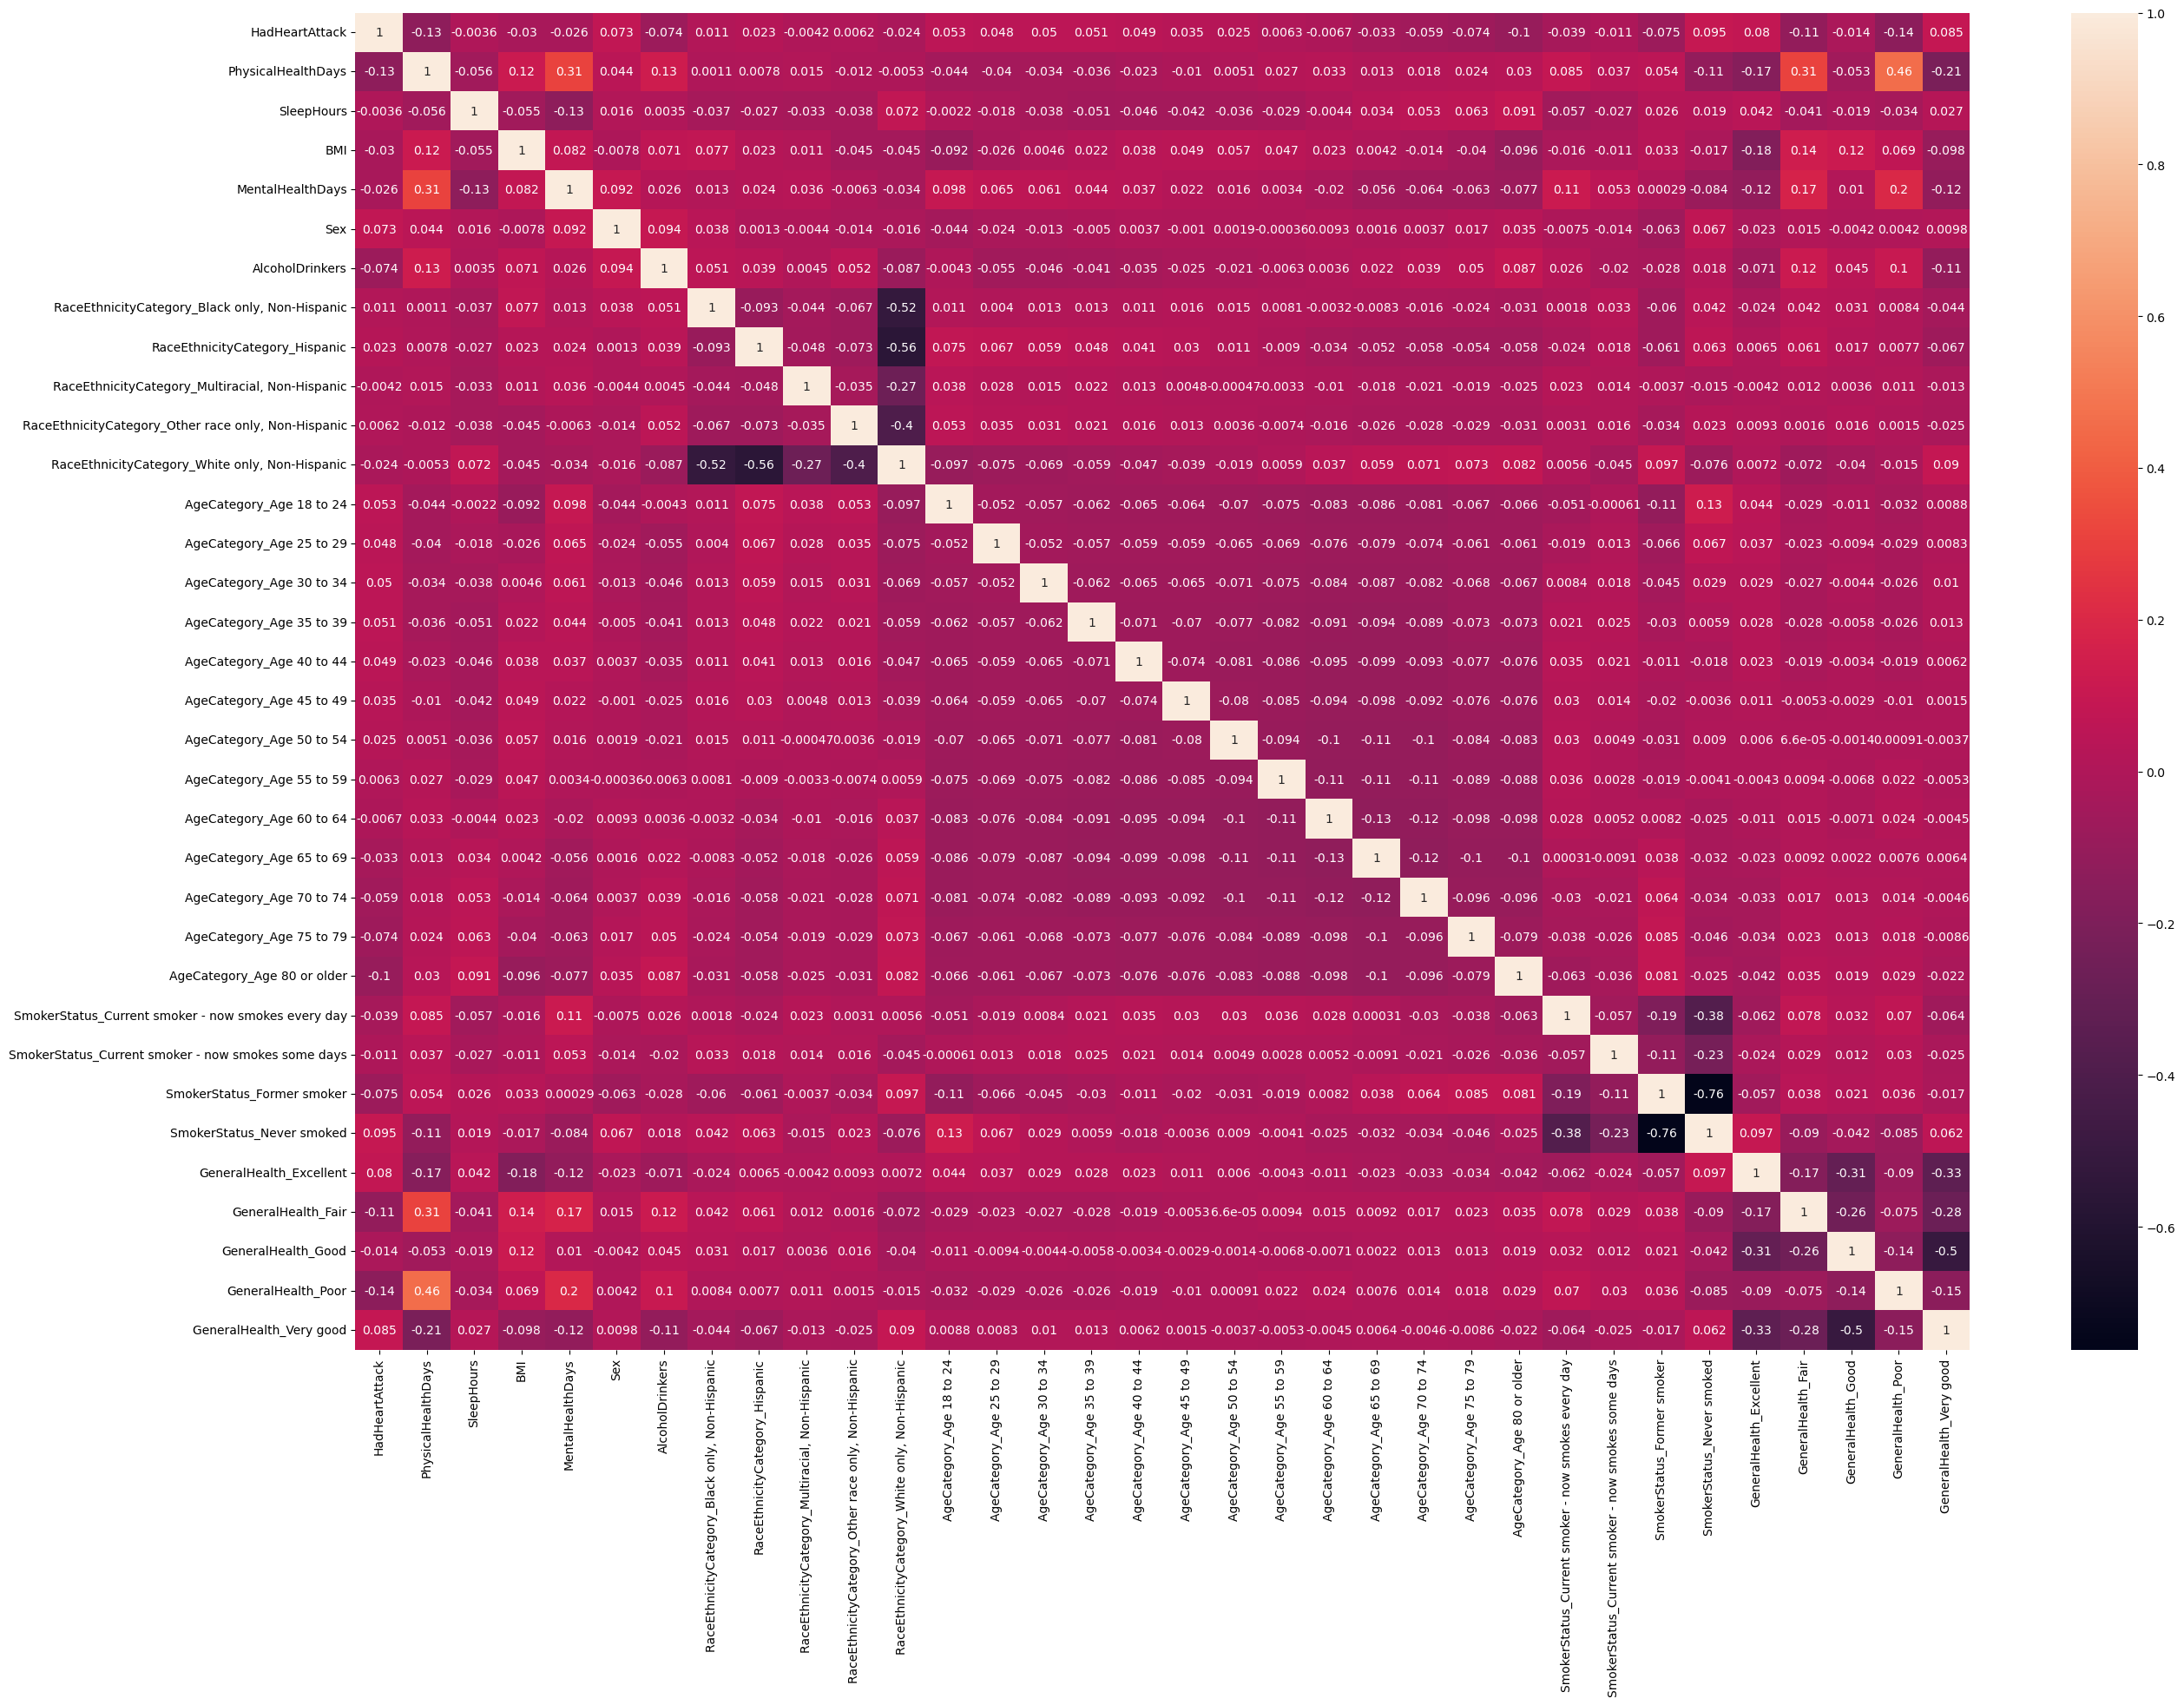

In [27]:
plt.figure(figsize=(30,20))
sns.heatmap(corrs, annot=True)
plt.show()

In [28]:
 abs(corrs.HadHeartAttack).sort_values(ascending=False)

HadHeartAttack                                         1.000000
GeneralHealth_Poor                                     0.140607
PhysicalHealthDays                                     0.133420
GeneralHealth_Fair                                     0.112319
AgeCategory_Age 80 or older                            0.100296
SmokerStatus_Never smoked                              0.094843
GeneralHealth_Very good                                0.085347
GeneralHealth_Excellent                                0.079933
SmokerStatus_Former smoker                             0.074537
AlcoholDrinkers                                        0.074181
AgeCategory_Age 75 to 79                               0.073567
Sex                                                    0.073316
AgeCategory_Age 70 to 74                               0.058590
AgeCategory_Age 18 to 24                               0.053068
AgeCategory_Age 35 to 39                               0.051119
AgeCategory_Age 30 to 34                

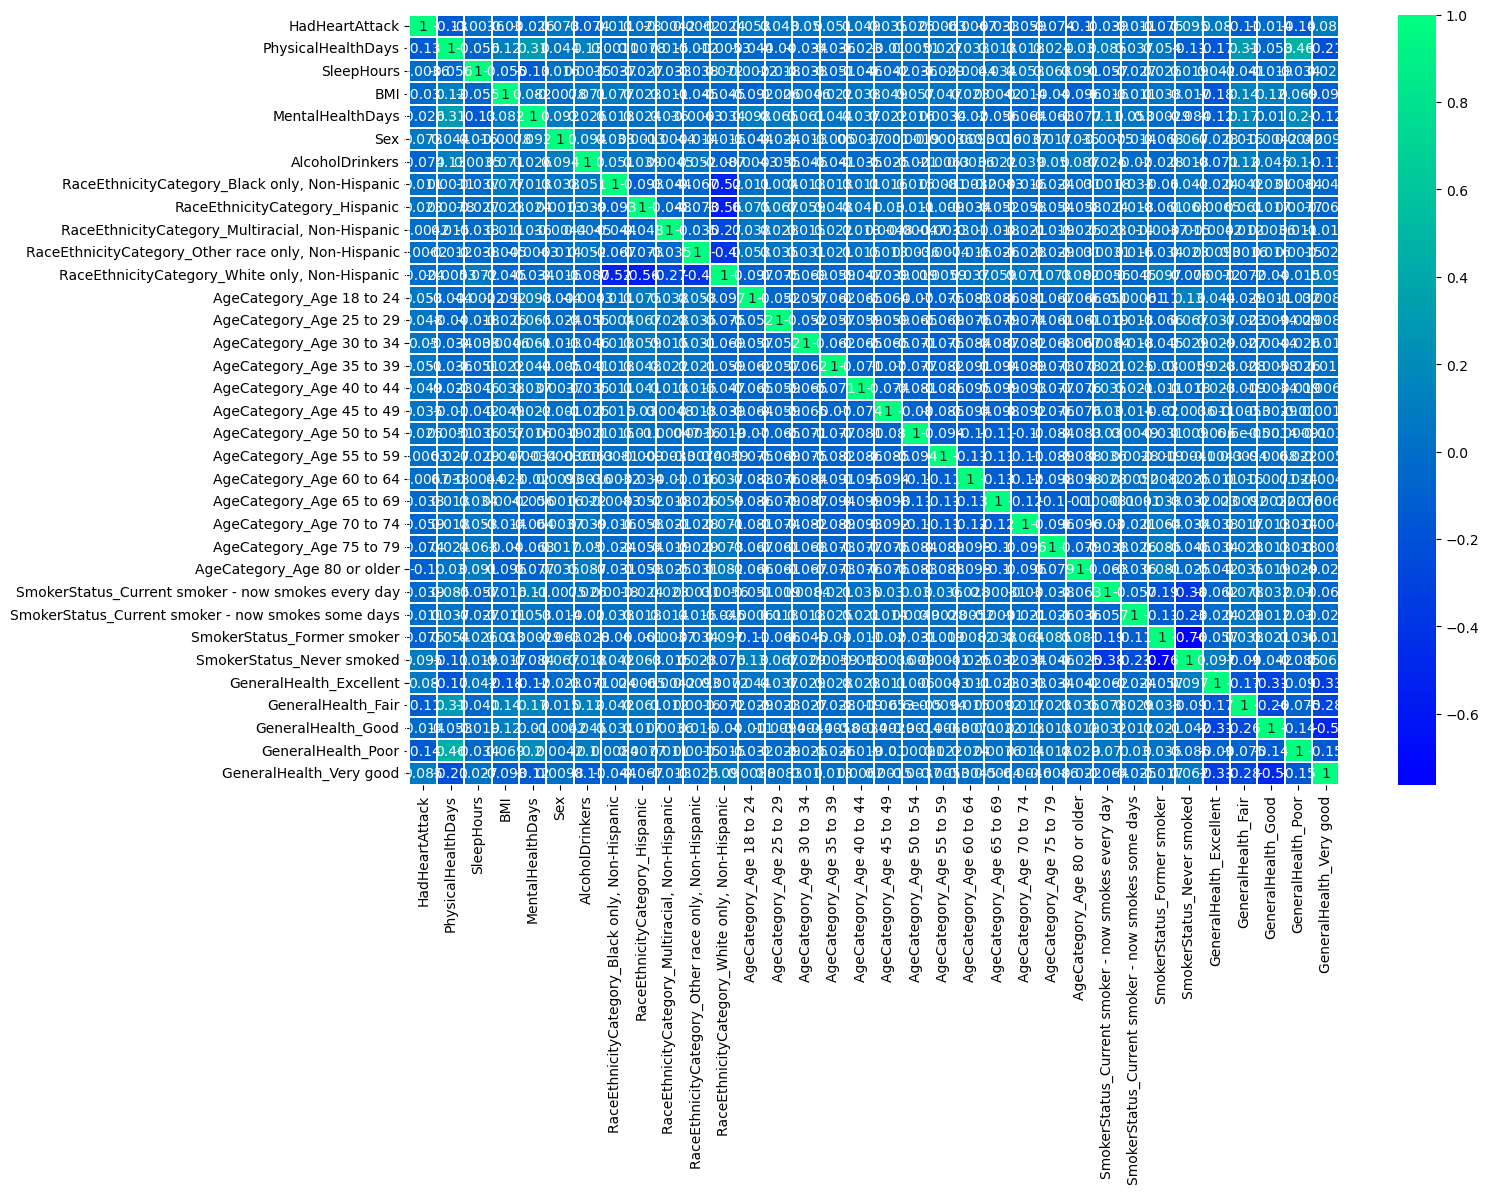

<Figure size 640x480 with 0 Axes>

In [29]:
# sources or inspiration https://www.analyticsvidhya.com/blog/2022/02/heart-disease-prediction-using-machine-learning-2/
plt.figure(figsize=(15,10))
sns.heatmap(df_final.corr(),linewidth=.01,annot=True,cmap="winter")
plt.show()
plt.savefig('correlationfigure')

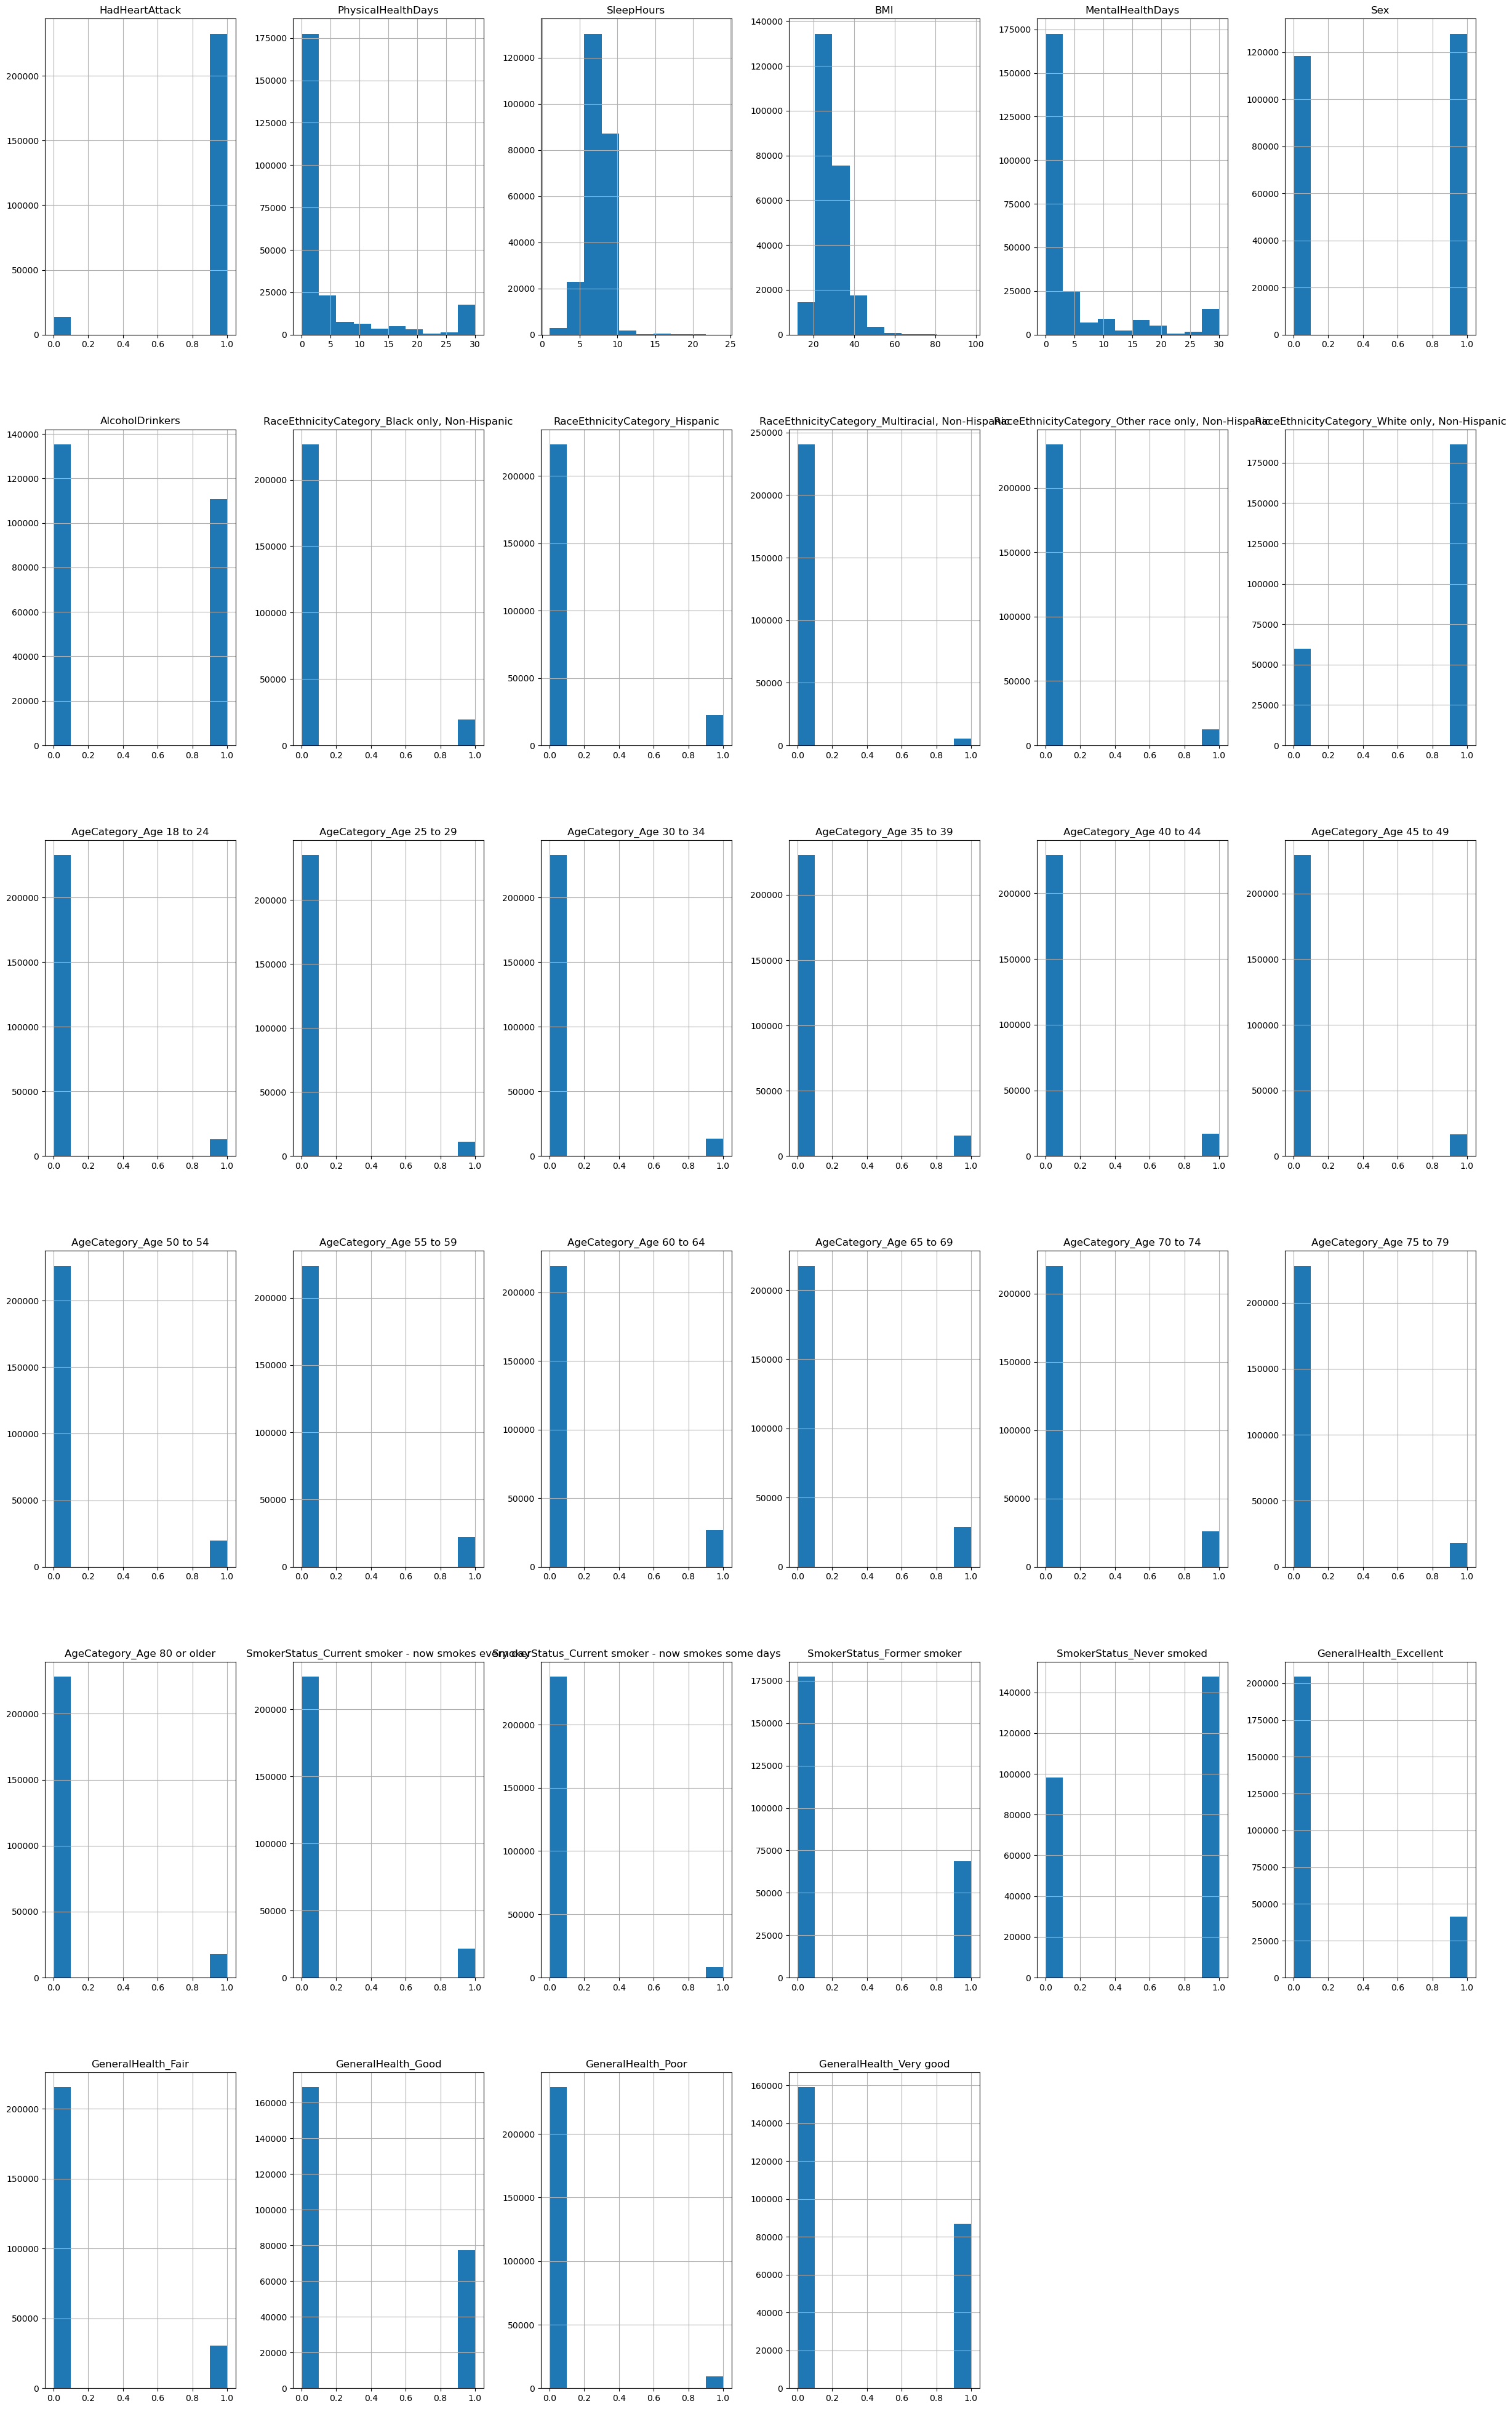

In [30]:
df_final.hist(figsize=(30,50))
plt.savefig('featuresplot')

In [31]:
# Step 1: Get the data
X = df_final.drop(columns=["HadHeartAttack"])
y = df_final.HadHeartAttack

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=1, stratify=y) # stratify=True maintains target class percentages
print(X_train.shape, X_test.shape)

(184516, 33) (61506, 33)


In [32]:
X_train.head()

,PhysicalHealthDays,SleepHours,BMI,MentalHealthDays,Sex,AlcoholDrinkers,"RaceEthnicityCategory_Black only, Non-Hispanic",RaceEthnicityCategory_Hispanic,"RaceEthnicityCategory_Multiracial, Non-Hispanic","RaceEthnicityCategory_Other race only, Non-Hispanic","RaceEthnicityCategory_White only, Non-Hispanic",AgeCategory_Age 18 to 24,AgeCategory_Age 25 to 29,AgeCategory_Age 30 to 34,AgeCategory_Age 35 to 39,AgeCategory_Age 40 to 44,AgeCategory_Age 45 to 49,AgeCategory_Age 50 to 54,AgeCategory_Age 55 to 59,AgeCategory_Age 60 to 64,AgeCategory_Age 65 to 69,AgeCategory_Age 70 to 74,AgeCategory_Age 75 to 79,AgeCategory_Age 80 or older,SmokerStatus_Current smoker - now smokes every day,SmokerStatus_Current smoker - now smokes some days,SmokerStatus_Former smoker,SmokerStatus_Never smoked,GeneralHealth_Excellent,GeneralHealth_Fair,GeneralHealth_Good,GeneralHealth_Poor,GeneralHealth_Very good
116564,0,8,26.39,8,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0
65562,0,6,22.31,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0
178884,2,8,18.79,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0
183153,30,5,24.96,30,1,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0
50759,0,6,24.96,0,1,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0


In [49]:
# Get list of categorical variables
s = (X_train.dtypes == 'object')
object_cols = list(s[s].index)

print("Categorical variables:")
print(object_cols)

Categorical variables:
[]


In [33]:
# Function for Classification
# THE ROC CURVE CODE WILL BREAK FOR MULTI_CLASS PROBLEMS
def doClassification(model, X_train, X_test, y_train, y_test):
    # Step 3: Fit the model
    model.fit(X_train, y_train)
    
    # Step 4: Evaluate the model
    train_preds = model.predict(X_train)
    test_preds = model.predict(X_test)

    train_proba = model.predict_proba(X_train)[:, 1]
    test_proba = model.predict_proba(X_test)[:, 1]

    # Generate metrics TRAIN
    train_cf = confusion_matrix(y_train, train_preds)
    train_cr = classification_report(y_train, train_preds)
    train_auc = roc_auc_score(y_train, train_proba)
    
    train_results = f"""TRAIN METRICS
    Confusion Matrix: 
    {train_cf}
    
    AUC: {train_auc}

    Classification Report:
    {train_cr}
    """
    
    print(train_results)

    # Generate metrics TEST
    test_cf = confusion_matrix(y_test, test_preds)
    test_cr = classification_report(y_test, test_preds)
    test_auc = roc_auc_score(y_test, test_proba)
    
    test_results = f"""TEST METRICS
    Confusion Matrix: 
    {test_cf}
    
    AUC: {test_auc}

    Classification Report:
    {test_cr}
    """
    
    print(test_results)

    # VISUALIZE TEST RESULTS
    # Confusion Matrix
    plt.figure(figsize=(4, 4))
    sns.heatmap(test_cf, annot=True, fmt='d', cmap='Blues', cbar=False, 
                xticklabels=['Predicted Negative', 'Predicted Positive'], 
                yticklabels=['Actual Negative', 'Actual Positive'])
    plt.title('Confusion Matrix')
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.show()

    # ROC Curve
    fpr, tpr, _ = roc_curve(y_test.values, test_proba)
    
    # Set figure size
    plt.figure(figsize=(6, 6))
    
    # Plot the ROC curve
    plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (area = {test_auc:.2f})')
    
    # Plot the diagonal reference line
    plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
    
    # Titles and labels
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    
    # Add grid and legend
    plt.grid(linestyle="--", color="lightgrey", alpha=0.75)
    plt.legend(loc="lower right")
    
    # Display the plot
    plt.show()

TRAIN METRICS
    Confusion Matrix: 
    [[    64  10012]
 [    83 174357]]
    
    AUC: 0.8168055764609058

    Classification Report:
                  precision    recall  f1-score   support

           0       0.44      0.01      0.01     10076
           1       0.95      1.00      0.97    174440

    accuracy                           0.95    184516
   macro avg       0.69      0.50      0.49    184516
weighted avg       0.92      0.95      0.92    184516

    
TEST METRICS
    Confusion Matrix: 
    [[   25  3334]
 [   32 58115]]
    
    AUC: 0.8168709933119431

    Classification Report:
                  precision    recall  f1-score   support

           0       0.44      0.01      0.01      3359
           1       0.95      1.00      0.97     58147

    accuracy                           0.95     61506
   macro avg       0.69      0.50      0.49     61506
weighted avg       0.92      0.95      0.92     61506

    


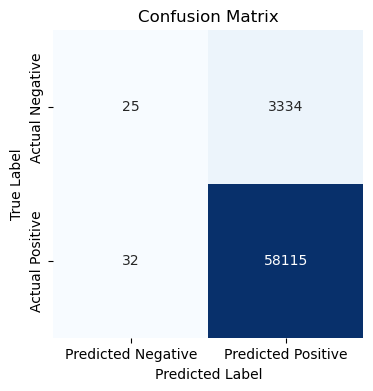

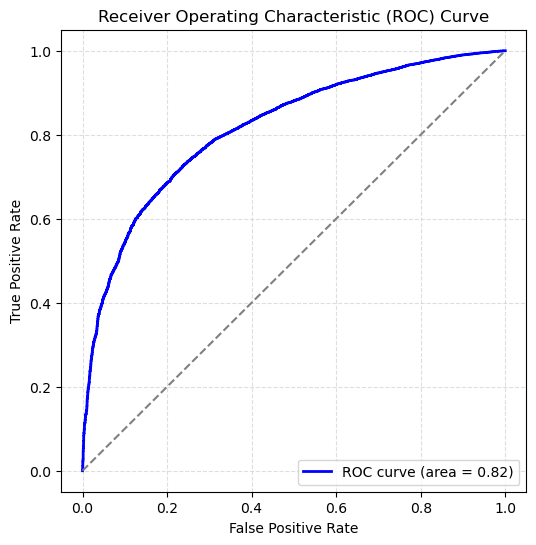

In [34]:
# Step 2: Init the Model
lr = LogisticRegression()

# Do Machine Learning
doClassification(lr, X_train, X_test, y_train, y_test)

TRAIN METRICS
    Confusion Matrix: 
    [[  9923    153]
 [   367 174073]]
    
    AUC: 0.9999156226369116

    Classification Report:
                  precision    recall  f1-score   support

           0       0.96      0.98      0.97     10076
           1       1.00      1.00      1.00    174440

    accuracy                           1.00    184516
   macro avg       0.98      0.99      0.99    184516
weighted avg       1.00      1.00      1.00    184516

    
TEST METRICS
    Confusion Matrix: 
    [[  519  2840]
 [ 3456 54691]]
    
    AUC: 0.5477809746578941

    Classification Report:
                  precision    recall  f1-score   support

           0       0.13      0.15      0.14      3359
           1       0.95      0.94      0.95     58147

    accuracy                           0.90     61506
   macro avg       0.54      0.55      0.54     61506
weighted avg       0.91      0.90      0.90     61506

    


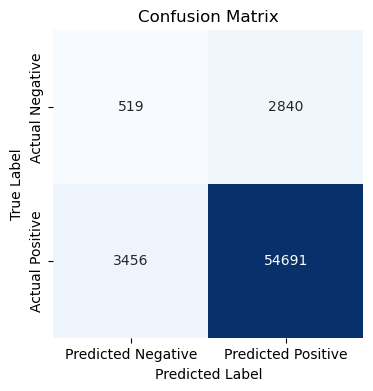

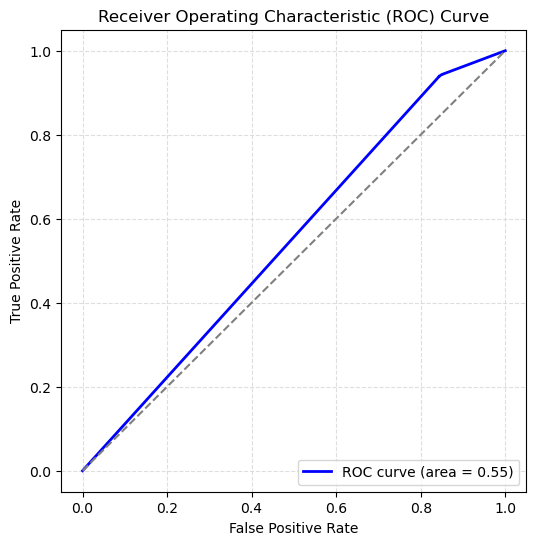

In [35]:
# Step 2: Init the Model
dt = DecisionTreeClassifier(random_state=42)

# Do Machine Learning
doClassification(dt, X_train, X_test, y_train, y_test)

TRAIN METRICS
    Confusion Matrix: 
    [[  9616    460]
 [    66 174374]]
    
    AUC: 0.9998434541374568

    Classification Report:
                  precision    recall  f1-score   support

           0       0.99      0.95      0.97     10076
           1       1.00      1.00      1.00    174440

    accuracy                           1.00    184516
   macro avg       1.00      0.98      0.99    184516
weighted avg       1.00      1.00      1.00    184516

    
TEST METRICS
    Confusion Matrix: 
    [[  189  3170]
 [  868 57279]]
    
    AUC: 0.7358212744036805

    Classification Report:
                  precision    recall  f1-score   support

           0       0.18      0.06      0.09      3359
           1       0.95      0.99      0.97     58147

    accuracy                           0.93     61506
   macro avg       0.56      0.52      0.53     61506
weighted avg       0.91      0.93      0.92     61506

    


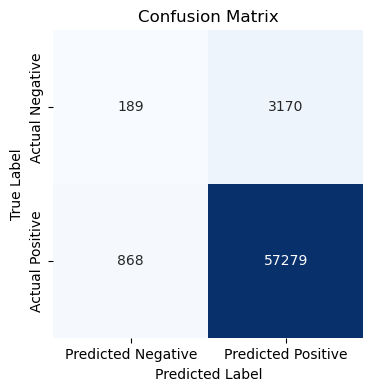

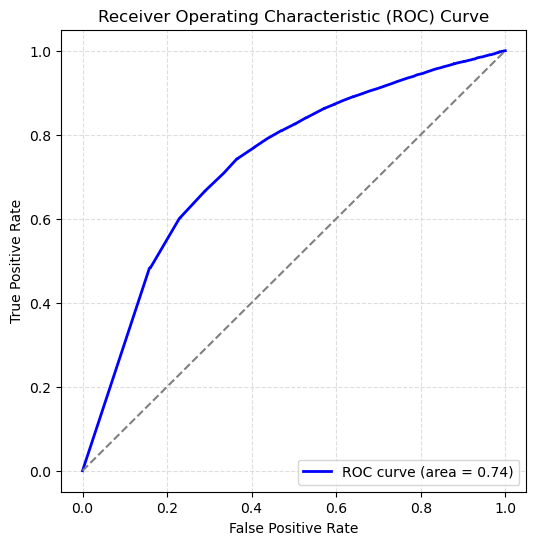

In [36]:
# Step 2: Init the Model
rf = RandomForestClassifier(random_state=42)

# Do Machine Learning
doClassification(rf, X_train, X_test, y_train, y_test)

TRAIN METRICS
    Confusion Matrix: 
    [[     0  10076]
 [     0 174440]]
    
    AUC: 0.5664128440750092

    Classification Report:
                  precision    recall  f1-score   support

           0       0.00      0.00      0.00     10076
           1       0.95      1.00      0.97    174440

    accuracy                           0.95    184516
   macro avg       0.47      0.50      0.49    184516
weighted avg       0.89      0.95      0.92    184516

    
TEST METRICS
    Confusion Matrix: 
    [[    0  3359]
 [    0 58147]]
    
    AUC: 0.5939121491227439

    Classification Report:
                  precision    recall  f1-score   support

           0       0.00      0.00      0.00      3359
           1       0.95      1.00      0.97     58147

    accuracy                           0.95     61506
   macro avg       0.47      0.50      0.49     61506
weighted avg       0.89      0.95      0.92     61506

    


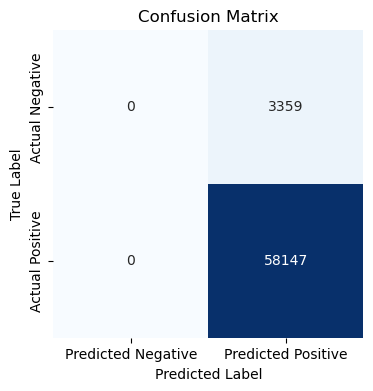

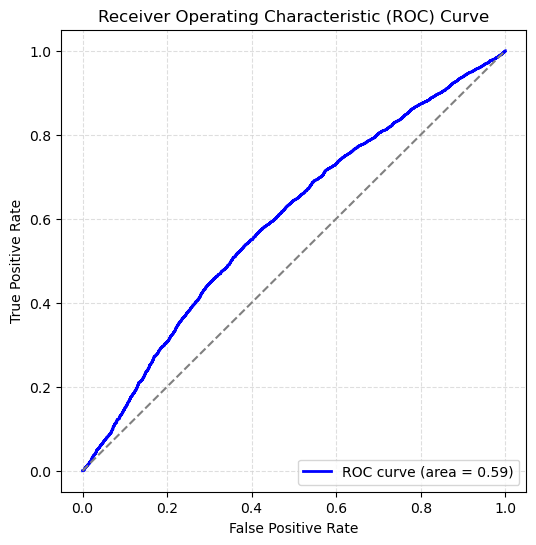

In [37]:
 # Step 2: Init the Model
svc = SVC(probability=True)

# Do Machine Learning
doClassification(svc, X_train, X_test, y_train, y_test)

In [ ]:
 # Step 2: Init the Model
knn = KNeighborsClassifier(n_neighbors=15)

# Do Machine Learning
doClassification(knn, X_train, X_test, y_train, y_test)

In [ ]:
 # Step 2: Init the Model
et = ExtraTreesClassifier(random_state=42)

# Do Machine Learning
doClassification(et, X_train, X_test, y_train, y_test)

In [ ]:
# Step 2: Init the Model
ada = AdaBoostClassifier(random_state=42)

# Do Machine Learning
doClassification(ada, X_train, X_test, y_train, y_test)

In [ ]:
# Step 2: Init the Model
gb = GradientBoostingClassifier(random_state=42)

# Do Machine Learning
doClassification(gb, X_train, X_test, y_train, y_test)

In [ ]:
 from xgboost import XGBClassifier
from lightgbm import LGBMClassifier

In [ ]:
 # Step 2: Init the Model
xgb = XGBClassifier(random_state=42)

# Do Machine Learning
doClassification(xgb, X_train, X_test, y_train, y_test)

In [44]:
# Step 2: Init the Model
lgbm = LGBMClassifier(random_state=42, verbose=-1)

# Do Machine Learning
doClassification(lgbm, X_train, X_test, y_train, y_test)

LightGBMError: Do not support special JSON characters in feature name.

In [ ]:
fi = pd.DataFrame(list(zip(X.columns, gb.feature_importances_)), columns=["Feature", "Importance"])
fi.sort_values(by="Importance", ascending=False)

In [ ]:
fi = pd.DataFrame(list(zip(X.columns, xgb.feature_importances_)), columns=["Feature", "Importance"])
fi.sort_values(by="Importance", ascending=False)

In [ ]:
fi = pd.DataFrame(list(zip(X.columns, lgbm.feature_importances_ / sum(lgbm.feature_importances_))), columns=["Feature", "Importance"])
fi.sort_values(by="Importance", ascending=False)

In [ ]:
fi = pd.DataFrame(list(zip(X.columns, ada.feature_importances_)), columns=["Feature", "Importance"])
fi.sort_values(by="Importance", ascending=False)

In [ ]:
# Retrain the model on the ENTIRE dataset
gb = GradientBoostingClassifier(random_state=42)
gb.fit(X, y)

In [ ]:
 # Save off my models
import pickle

# Scaler
pickle.dump(scaler, open("heartattack_scaler.h5", 'wb'))

# Model
pickle.dump(gb, open("heartattack.h5", 'wb')